In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
T = 100 #100msec
dt = 0.25 #step size
time = np.arange(0, T+dt, dt)

In [0]:
#LIF properties
Vm = np.zeros(len(time))
Rm = 2 #in kOhms
Cm = 5 #in microf
tau_m = Rm * Cm
tau_ref = 5 #refactory period
Vth = 1 #in mV

In [0]:
#simulating the neuron for different inputs I
#part 1
I = np.zeros(len(time))
for i,t in enumerate(time):
    if t < 10:
        I[i] = 0
    elif t > 75:
        I[i] = 0
    else:
        I[i] = 2 #in microA

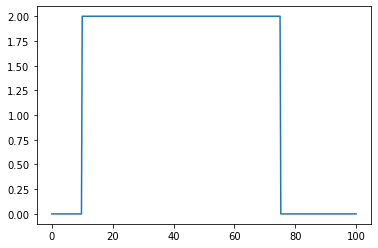

In [5]:
plt.plot(time, I)

In [0]:
#the neuron
def simulate(I):
    t_rest = 0
    for i,t in enumerate(time):
        if t > t_rest:
            Vm[i] = Vm[i-1] + (-Vm[i-1] + I[i-1]*Rm) * dt / tau_m

            if Vm[i] >= Vth:
                t_rest  = t + tau_ref
    return Vm

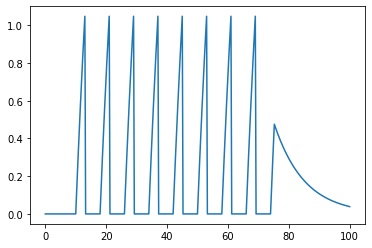

In [7]:
Vm = simulate(I)
plt.plot(time, Vm)

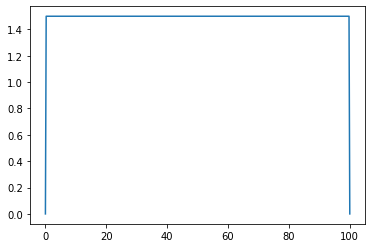

In [8]:
#part 2
for i, t in enumerate(time):
    if t>0 and t<100:
        I[i] = 1.5
    else:
        I[i] = 0

plt.plot(time, I)

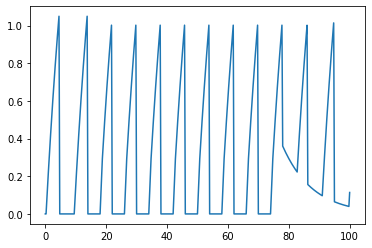

In [9]:
Vm = simulate(I)
plt.plot(time, Vm)

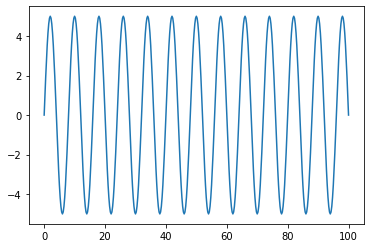

In [10]:
#part 3
I = 5 * np.sin(np.pi * 0.25 * time)

plt.plot(time, I)

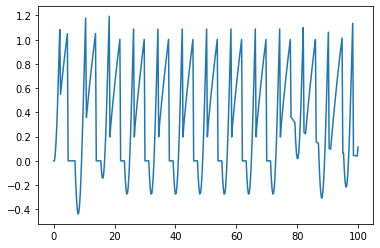

In [11]:
Vm = simulate(I)
plt.plot(time, Vm)

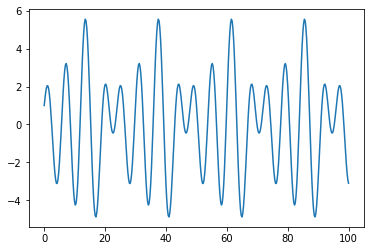

In [12]:
#part 4
I = -2*np.sin(0.25*np.pi*time) + 3*np.sin((np.pi/3)*time) + np.cos((np.pi/6)*time)
plt.plot(time, I)

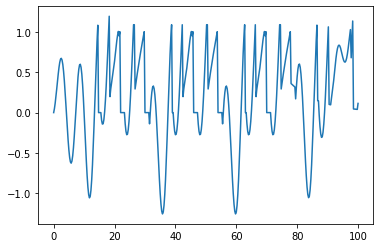

In [13]:
Vm = simulate(I)
plt.plot(time, Vm)

In [22]:
#plot u vs i for a constant input

current = np.arange(0, 100)
tau_m = Rm * Cm
T = tau_ref + tau_m * np.log(Rm*current/(Rm*current - Vth))
freq = 1/T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0, 0.5, 'freq')

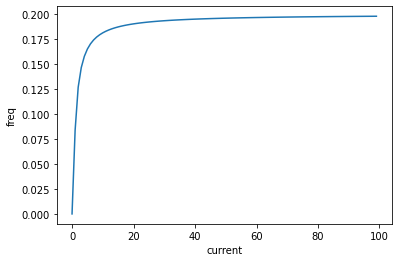

In [24]:
plt.plot(current, freq)
plt.xlabel("current")
plt.ylabel("freq")